# **Sử dụng Neural Network để xây dựng mô hình phân lớp trên bộ dữ liệu MNIST từ thư viện Keras (chia train – test – validation)**

Mô tả bộ dữ liệu MNIST: được tạo ra từ một tập hợp các ảnh kỹ thuật số của các
chữ số viết tay từ 0 đến 9. Gồm 70.000 ảnh kỹ thuật số, trong đó 60.000 ảnh được sử dụng cho train và 10.000 ảnh được sử dụng cho test.

Mỗi ảnh trong bộ dữ liệu MNIST có kích thước 28x28 pixel và là ảnh đen trắng
(grayscale). Các pixel được mã hóa dưới dạng giá trị từ 0 đến 255, trong đó 0 đại diện cho màu đen tuyệt đối và 255 đại diện cho màu trắng tuyệt đối.

Mỗi ảnh được gán một nhãn, tương ứng với chữ số mà nó đại diện. Nhãn được
biểu diễn dưới dạng số nguyên từ 0 đến 9.

**a) Đọc bộ dữ liệu train, test của MNIST từ Keras**

In [1]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Shape of training images: {train_images.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test images: {test_images.shape}")
print(f"Shape of test labels: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


**b) In ra kích thước của tập train, test**

In [3]:
print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Kích thước của tập train_images: {train_images.shape}")
print(f"Kích thước của tập train_labels: {train_labels.shape}")
print(f"Kích thước của tập test_images: {test_images.shape}")
print(f"Kích thước của tập test_labels: {test_labels.shape}")

Huỳnh Thị Trúc Lam - 6351071040
Kích thước của tập train_images: (60000, 28, 28)
Kích thước của tập train_labels: (60000,)
Kích thước của tập test_images: (10000, 28, 28)
Kích thước của tập test_labels: (10000,)


**c) Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]**

Hướng dẫn: Chia 255.0

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Giá trị pixel tối thiểu của train_images sau chuẩn hóa: {train_images.min()}")
print(f"Giá trị pixel tối đa của train_images sau chuẩn hóa: {train_images.max()}")
print(f"Giá trị pixel tối thiểu của test_images sau chuẩn hóa: {test_images.min()}")
print(f"Giá trị pixel tối đa của test_images sau chuẩn hóa: {test_images.max()}")

Huỳnh Thị Trúc Lam - 6351071040
Giá trị pixel tối thiểu của train_images sau chuẩn hóa: 0.0
Giá trị pixel tối đa của train_images sau chuẩn hóa: 1.0
Giá trị pixel tối thiểu của test_images sau chuẩn hóa: 0.0
Giá trị pixel tối đa của test_images sau chuẩn hóa: 1.0


**d) Chia tập train ban đầu thành tập train và tập validaion theo tỷ lệ 8:2**

In [5]:
from sklearn.model_selection import train_test_split

# Chia tập train ban đầu thành tập train và tập validation theo tỷ lệ 8:2
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Shape of new training images: {train_images.shape}")
print(f"Shape of new training labels: {train_labels.shape}")
print(f"Shape of validation images: {validation_images.shape}")
print(f"Shape of validation labels: {validation_labels.shape}")
print(f"Shape of test images (unchanged): {test_images.shape}")
print(f"Shape of test labels (unchanged): {test_labels.shape}")

Huỳnh Thị Trúc Lam - 6351071040
Shape of new training images: (48000, 28, 28)
Shape of new training labels: (48000,)
Shape of validation images: (12000, 28, 28)
Shape of validation labels: (12000,)
Shape of test images (unchanged): (10000, 28, 28)
Shape of test labels (unchanged): (10000,)


**e) Xây dựng Neural Network gồm các layers:**
- Flatten layer: Làm phẳng, chuyển đổi dữ liệu từ định dạng 2D (28x28
pixel) thành vector 1D (784 chiều)
- Dense layer: Gồm 128 neural, sử dụng hàm kích hoạt Relu và các neural
được kết nối đầy đủ với các neural ở lớp trước đó (Fully connected)
- Drop out layer: ngẫu nhiên "tắt" một số neuron trong quá trình huấn
luyện, nhằm giảm thiểu hiện tượng overfitting. Mỗi neuron sẽ có xác suất
20% để bị tắt.
- Dense layer: Gồm số lượng neural là số class cần phân lớp, sử dụng hàm
kích hoạt Softmax để tính xác suất của từng class và các neural được kết
nối đầy đủ (Fully connected).

In [8]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
import numpy as np

# Determine the number of classes
num_classes = len(np.unique(train_labels))

# Build the Neural Network model
model = Sequential([
    Input(shape=(28, 28)),           # Input layer
    Flatten(),                       # Flatten layer
    Dense(128, activation='relu'),   # Hidden layer
    Dropout(0.2),                    # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer
])

print("Huỳnh Thị Trúc Lam - 6351071040")
model.summary()

Huỳnh Thị Trúc Lam - 6351071040


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**f) Biên dịch mô hình sử dụng optimizer: adam; loss: sparse_categorical_crossentropy; metric: accuracy**

In [9]:
print("Huỳnh Thị Trúc Lam - 6351071040")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Huỳnh Thị Trúc Lam - 6351071040


**g) Huấn luyện mô hình dựa trên tập train, đánh giá với tập validation; epoch: 5; batch_size: 32**

In [10]:
print("Huỳnh Thị Trúc Lam - 6351071040")
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_data=(validation_images, validation_labels))

Huỳnh Thị Trúc Lam - 6351071040
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8494 - loss: 0.5174 - val_accuracy: 0.9509 - val_loss: 0.1683
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9488 - loss: 0.1728 - val_accuracy: 0.9658 - val_loss: 0.1182
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9652 - loss: 0.1191 - val_accuracy: 0.9697 - val_loss: 0.1029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9713 - loss: 0.0962 - val_accuracy: 0.9722 - val_loss: 0.0910
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9764 - loss: 0.0783 - val_accuracy: 0.9765 - val_loss: 0.0780


**h) Vẽ biểu đồ thể hiện accuracy, loss sau mỗi epoch.**

Huỳnh Thị Trúc Lam - 6351071040


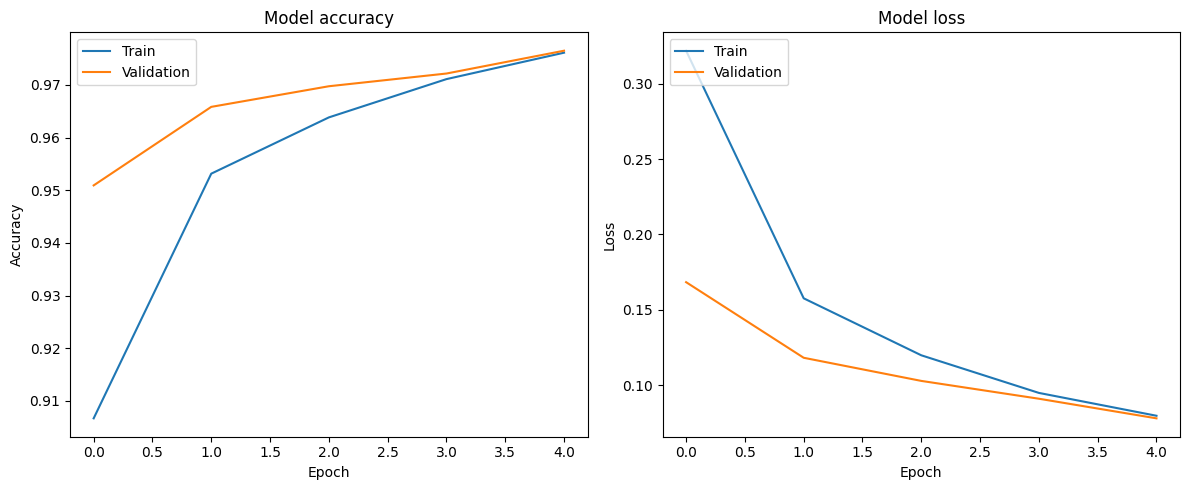

In [11]:
import matplotlib.pyplot as plt

print("Huỳnh Thị Trúc Lam - 6351071040")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**i) Dự đoán phân lớp cho tập test**

In [12]:
import numpy as np

print("Huỳnh Thị Trúc Lam - 6351071040")

# Dự đoán xác suất phân lớp cho tập test
predictions = model.predict(test_images)

# Chuyển đổi xác suất thành nhãn lớp dự đoán
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels for the first 10 test images:", predicted_labels[:10])
print("Actual labels for the first 10 test images:", test_labels[:10])

Huỳnh Thị Trúc Lam - 6351071040
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicted labels for the first 10 test images: [7 2 1 0 4 1 4 9 5 9]
Actual labels for the first 10 test images: [7 2 1 0 4 1 4 9 5 9]


**j) Tính và in ra Accuracy của mô hình trên tập test**

**j) Tính và in ra Accuracy của mô hình trên tập test**

In [13]:
from sklearn.metrics import accuracy_score

print("Huỳnh Thị Trúc Lam - 6351071040")

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

print(f"Accuracy of the model on the test set: {accuracy:.4f}")

Huỳnh Thị Trúc Lam - 6351071040
Accuracy of the model on the test set: 0.9752


**k) Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test**

In [14]:
from sklearn.metrics import classification_report

print("Huỳnh Thị Trúc Lam - 6351071040")

# Generate classification report
report = classification_report(test_labels, predicted_labels)

print("Classification Report on Test Set:")
print(report)

Huỳnh Thị Trúc Lam - 6351071040
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**l) Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)**

Huỳnh Thị Trúc Lam - 6351071040


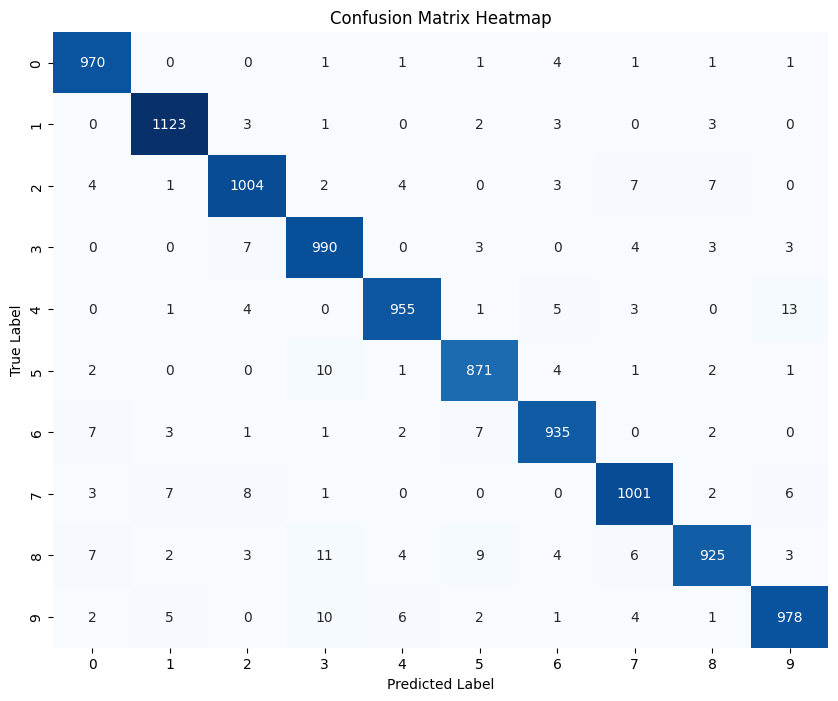

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Huỳnh Thị Trúc Lam - 6351071040")

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

**m)In ra kết quả phân lớp của 05 ảnh đầu tiên trong tập test**

Huỳnh Thị Trúc Lam - 6351071040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


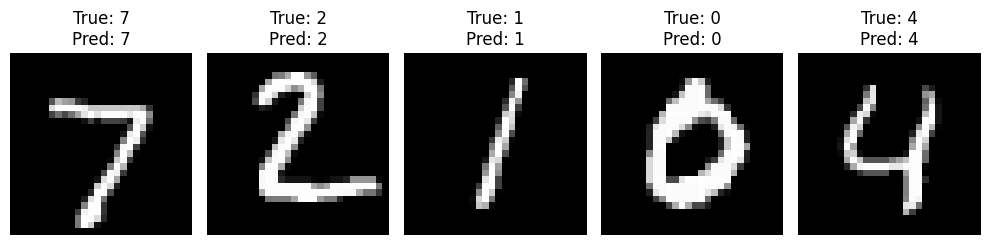

In [16]:
import matplotlib.pyplot as plt
import numpy as np

print("Huỳnh Thị Trúc Lam - 6351071040")

plt.figure(figsize=(10, 5))
for i in range(5):
    # Lấy ảnh từ tập test
    image = test_images[i]
    actual_label = test_labels[i]

    # Chuẩn bị ảnh cho dự đoán (thêm chiều batch)
    # model.predict expects a batch of images, so we add a batch dimension
    image_for_prediction = np.expand_dims(image, axis=0)

    # Dự đoán
    prediction = model.predict(image_for_prediction)
    predicted_label = np.argmax(prediction)

    # Hiển thị ảnh và kết quả
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {actual_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**n) In ra 05 kết quả đầu tiên phân lớp sai so với nhãn thực tế trong tập test**

**n) In ra 05 kết quả đầu tiên phân lớp sai so với nhãn thực tế trong tập test**

Huỳnh Thị Trúc Lam - 6351071040


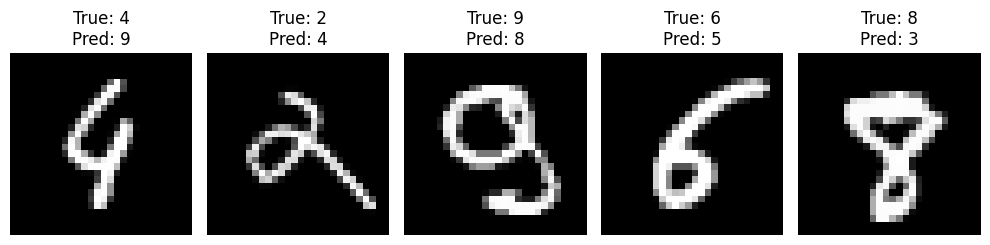

In [17]:
import matplotlib.pyplot as plt
import numpy as np

print("Huỳnh Thị Trúc Lam - 6351071040")

# Tìm các chỉ số của các mẫu bị phân loại sai
misclassified_indices = np.where(predicted_labels != test_labels)[0]

plt.figure(figsize=(10, 5))
# Hiển thị 5 ảnh đầu tiên bị phân loại sai
for i, index in enumerate(misclassified_indices[:5]):
    # Lấy ảnh, nhãn thực tế và nhãn dự đoán
    image = test_images[index]
    actual_label = test_labels[index]
    predicted_label = predicted_labels[index]

    # Hiển thị ảnh và kết quả
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {actual_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()